# Adjusting thrshold using validation set

In [2]:
%load_ext autoreload
%autoreload 2
%pylab
%matplotlib inline

import pandas as pd
import pickle
import numpy as np
import sys
import os

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [7]:
from utils import plot_ROC
from adaptive_sv_system.utils import cos_dist_sim_torch, euc_dist_sim

In [12]:
f_sim = 'cos'
embeds = np.load('xvector_embeds/sv_embeds.npy')

Train Accuracy: 0.9320381628722325 
Train AUC: 0.9362077392691408 
Train Confusion Matrix:
[[ 82474   4302]
 [ 12388 146415]]


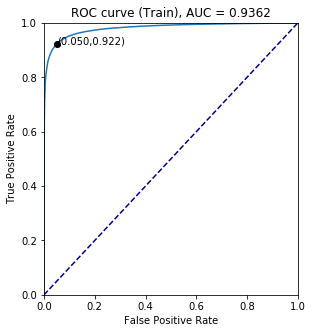

In [16]:
# trial for finding best threshold
trial_for_thresh = pd.read_pickle("trials/enr306_closedset/trial_for_thresh.pkl")

if f_sim == 'cos':
    train_score_vector = cos_dist_sim_torch(embeds[trial_for_thresh.enrolment_id],
                                      embeds[trial_for_thresh.test_id], dim=1)
elif f_sim == 'euc':
    train_score_vector =  euc_dist_sim(embeds[trial_for_thresh.enrolment_id], 
                                       embeds[trial_for_thresh.test_id], dim=1)
    
train_label_vector = trial_for_thresh.label.tolist()
accept_thres, fpr_, tpr_, thres_ = plot_ROC(train_label_vector, train_score_vector)

In [17]:
fnr_ = 1 - tpr_

In [22]:
fnr_

array([9.99993703e-01, 9.99615876e-01, 9.99603282e-01, ...,
       6.29711026e-06, 0.00000000e+00, 0.00000000e+00])

In [29]:
thres_[np.where(fnr_ < 0.01)[0][0]]

0.46138534